In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [17]:
1.064*6.022E23/13*1E-4*2.17E-2*1E-24

150/3.6667155982838e-20/60

6.818090830851787e+19

Particles/neutron:  17524124473561.068
1.468172867108605e-16
[1.63460186e-15 1.66771865e-15 1.56985506e-15 1.79817795e-15
 2.63501719e-15]


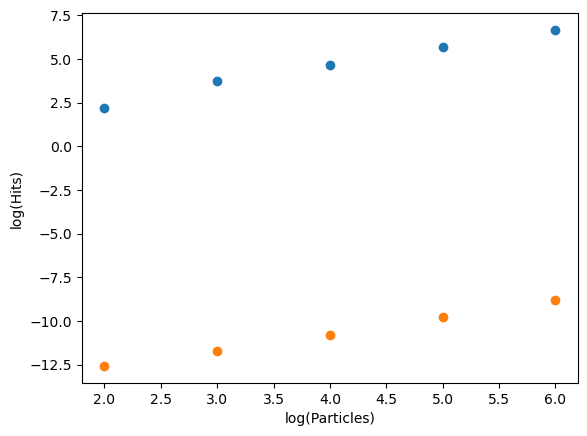

In [21]:
part_uA = 1
particles = 1
sec = 1
hr = 60*60*sec
uRem = 1
coulomb = 6.241509E18*particles

amp = 1*coulomb/sec

dose_rate = 150.1 *uRem/hr

particle_uA = amp*10E-6

print("Particles/neutron: ", 1/(213.7/(particle_uA*60)))

dose_p_part_exp = dose_rate / (4.55*particle_uA)
print(dose_p_part_exp)

N_Particles = np.array([1000000,100000,10000,1000,100])
N_Hits = np.array([4545588,457537,43653,5749,162])
Dose = np.array([1.6346018622916e-09,1.6677186473538e-10,1.5698550570883e-11,1.7981779469474e-12,2.6350171870598e-13])

dose_p_part = Dose/N_Particles
print(dose_p_part)

plt.figure()
plt.scatter(np.log10(N_Particles),np.log10(N_Hits))
plt.xlabel("log(Particles)")
plt.ylabel("log(Hits)")
plt.scatter(np.log10(N_Particles),np.log10(Dose))
plt.show()

15.328726970914719


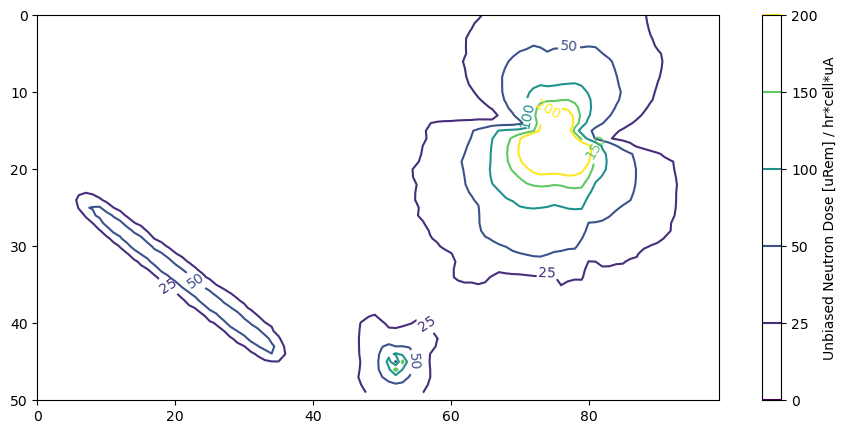

In [19]:
box_mesh_df = pd.read_csv("MeshDumpTest.csv",delimiter=",",names = ["iX", "iY", "iZ", "total(value) [NoUnit]", "total(val^2)", "entry"],skiprows=3)

contour = True

colors = [
    (0.0, "white"),    # Start with white
    (0.2, "blue"),     # Transition to blue
    (0.4, "green"),    # Transition to green
    (0.6, "yellow"),   # Transition to yellow
    (0.8, "orange"),   # Transition to orange
    (1.0, "red"),      # End with red
]

root_cmap = LinearSegmentedColormap.from_list("ROOT", colors)

x_max = box_mesh_df ["iX"].max()
nx = x_max+1
y_max = box_mesh_df ["iZ"].max()
ny = y_max+1
value = box_mesh_df["total(value) [NoUnit]"]
value_grid = np.zeros((nx,ny))
for i in range(len(value)):
    if (i+1) % ny == 0:
        row_num = int((i+1)/ny)
        #print(value[(i-ny+1):i+1])
        value_grid[row_num-1,:]=value[i-ny+1:i+1]

x_coord = np.linspace(0,x_max+1,nx+1)
y_coord = np.linspace(0,y_max+1,ny+1)

value_grid = value_grid.transpose()

value_rems = value_grid*(0.036*(2*4.5*2.54*6.3*2.54*2)/(100*9)*(6.3E6*60*60)/1E3/100)/0.74848

print(sum(value))

fig,ax = plt.subplots()
fig.set_size_inches(11,5)
if contour:
    x_coord = x_coord[:-1]
    y_coord = y_coord[:-1]
    cont = plt.contour(x_coord,y_coord,value_rems,levels=[0,25,50,100,150,200])
    cont.clabel()
#plt.pcolormesh(x_coord,y_coord,value_rems,cmap=root_cmap)
plt.ylim(50,0)
colorbar = plt.colorbar()
colorbar.set_label("Unbiased Neutron Dose [uRem] / hr*cell*uA")
#colorbar.set_label("Unbiased Neutron Flux / cell")
plt.show()
#xi,yi = np.meshgrid(x_coord,y_coord)

